## Clustering Basado en las acciones

In [9]:
import pandas as pd

In [10]:
url_base = "https://raw.githubusercontent.com/Andru-1987/74235-_DataScience_I/refs/heads/main/clase_6/storage/acciones/"

In [11]:
symbols_map = {
    "D": "Dominion Energy Inc.",
    "EXC": "Exelon Corp.",
    "NEE": "NextEra Energy Inc.",
    "SO": "Southern Co.",
    "DUK": "Duke Energy Corp."
}

matched_file_names = {
    symbol: url_base + symbol + ".csv" for symbol in symbols_map.keys()
}

final_dataframe = []

for symbol_name, path_csv in matched_file_names.items():
    df = pd.read_csv(path_csv, sep=",")
    df["Name"] = symbols_map[symbol_name]
    final_dataframe.append(df)

final_dataframe = pd.concat(final_dataframe, ignore_index=True)
final_dataframe.columns = final_dataframe.columns.str.lower()

In [12]:
final_dataframe.sample(20)

,date,open,high,low,close,adj close,volume,name
3527,2018-07-30,166.720001,167.179993,165.750000,166.229996,162.004364,1514800,NextEra Energy Inc.
605,2016-12-19,76.370003,76.650002,75.750000,76.510002,68.593307,2359000,Dominion Energy Inc.
147,2015-02-26,72.809998,73.010002,71.750000,71.949997,60.371677,2416200,Dominion Energy Inc.
4299,2016-08-22,52.090000,52.240002,51.930000,52.000000,45.461121,4830900,Southern Co.
2245,2018-06-26,41.950001,42.220001,41.799999,42.029999,40.771358,10904000,Exelon Corp.
916,2018-03-16,70.760002,70.959999,69.940002,70.610001,66.491852,12427600,Dominion Energy Inc.
2968,2016-05-10,119.279999,119.989998,118.910004,119.599998,108.557198,1159300,NextEra Energy Inc.
1151,2019-02-22,74.540001,75.050003,74.070000,75.050003,73.246353,3219100,Dominion Energy Inc.
3974,2015-05-08,44.639999,44.720001,43.759998,44.150002,36.012310,8423800,Southern Co.
964,2018-05-24,63.900002,64.110001,63.630001,64.000000,60.267361,4346900,Dominion Energy Inc.


---


# Análisis de Clustering para Acciones del Mercado

## Preparación de Datos

Para identificar acciones similares, necesitamos extraer características que capturen el comportamiento de cada acción:

1. **Precio promedio**: Nivel general de precio
2. **Volatilidad**: Rango entre máximo y mínimo
3. **Cambio diario**: Diferencia entre cierre y apertura
4. **Volumen promedio**: Actividad de trading



## Algoritmos de Clustering Aplicables

### 1. K-means (No Jerárquico)

**Ventajas para este caso:**
- Simple y eficiente
- Funciona bien con datos numéricos continuos como precios
- Útil cuando conocemos aproximadamente cuántas empresas similares esperamos

**Desventajas:**
- Requiere definir el número de clusters previamente
- Sensible a outliers (valores extremos)

**Cuándo usarlo:** Si queremos agrupar las 5 empresas en 2-3 categorías conocidas (ej: alto, medio, bajo rendimiento).

### 2. Clustering Jerárquico Aglomerativo

**Ventajas para este caso:**
- No requiere definir número de clusters anticipadamente
- Genera un dendrograma que muestra relaciones entre todas las acciones
- Útil para explorar similitudes entre empresas

**Desventajas:**
- Más costoso computacionalmente
- Menos eficiente con datasets grandes

**Cuándo usarlo:** Para análisis exploratorio y visualizar qué acciones son más parecidas entre sí.

### 3. DBSCAN (Densidad)

**Ventajas para este caso:**
- Identifica clusters de forma arbitraria
- Detecta outliers automáticamente

**Desventajas:**
- Requiere ajustar parámetros (epsilon, min_samples)
- Con solo 5 empresas, puede no ser la mejor opción
- Necesita suficiente densidad de datos

**Cuándo usarlo:** Si tuviéramos muchas más acciones y quisiéramos identificar grupos naturales sin asumir formas esféricas.



## Recomendación para este Caso

**Algoritmo sugerido: Clustering Jerárquico Aglomerativo**

**Justificación:**
1. Tenemos pocas empresas (5), lo que hace manejable el costo computacional
2. No sabemos a priori cuántos grupos naturales existen
3. El dendrograma nos permitirá visualizar claramente las similitudes
4. Es más interpretable para análisis inicial

**Alternativa válida:** K-means con k=2 o k=3 si queremos clasificar las acciones en categorías predefinidas (ej: crecimiento alto vs. estable).



## Métricas de Evaluación

### Métricas Internas

Estas métricas evalúan la calidad del clustering sin información externa:

#### 1. Coeficiente de Silueta (Silhouette Score)
- **Rango:** -1 a 1
- **Interpretación:**
  - Cerca de 1: Puntos bien agrupados en su cluster
  - Cerca de 0: Puntos en el límite entre clusters
  - Negativo: Probablemente mal asignados
- **Valor ideal:** > 0.5

#### 2. Índice de Davies-Bouldin
- **Rango:** 0 a infinito
- **Interpretación:** Mide la relación entre dispersión intra-cluster y separación inter-cluster
- **Valor ideal:** Más bajo es mejor (clusters más compactos y separados)

#### 3. Índice de Calinski-Harabasz
- **Rango:** 0 a infinito
- **Interpretación:** Ratio de dispersión entre clusters vs. dentro de clusters
- **Valor ideal:** Más alto es mejor

### Métricas para Jerárquico

#### 4. Coeficiente de Correlación Cofenética
- **Rango:** -1 a 1
- **Interpretación:** Qué tan bien el dendrograma preserva las distancias originales
- **Valor ideal:** > 0.7 indica buena representación



### Cómo Interpretar Resultados

**Ejemplo práctico:**
Si obtenemos:
- Silhouette Score = 0.65
- Davies-Bouldin = 0.8
- Calinski-Harabasz = 150

**Interpretación:** Los clusters están bien definidos (Silhouette alto), son compactos y separados (Davies-Bouldin bajo), con buena separación general (Calinski alto).

### Validación del Número de Clusters

**Método del Codo:**
- Graficar inercia (suma de distancias cuadradas) vs. número de clusters
- Buscar el "codo" donde la mejora se reduce significativamente

**Análisis de Silueta:**
- Calcular Silhouette Score para diferentes valores de k
- Elegir k que maximice este valor



## Flujo de Trabajo Recomendado

1. **Extraer características** de cada acción (medias, volatilidades, tendencias)
2. **Normalizar datos** (importante: las variables tienen escalas diferentes)
3. **Aplicar clustering jerárquico** con diferentes métodos de enlace (ward, complete, average)
4. **Visualizar dendrograma** para identificar número natural de clusters
5. **Calcular métricas** (Silhouette, Davies-Bouldin, Calinski-Harabasz)
6. **Validar con K-means** usando el número de clusters identificado
7. **Interpretar resultados** en contexto del negocio

## Consideraciones Finales

- La normalización es crítica porque precios y volúmenes tienen magnitudes muy diferentes
- Considerar características temporales (tendencias, estacionalidad)
- Validar resultados con conocimiento del dominio (sector energético)
- Las métricas son guías, no verdades absolutas: la interpretabilidad importa

---

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

<details>
    <summary><strong>Apartado especial sobre por que el StandarScaler y no el Normalizer</strong></summary>

## Diferencias entre StandardScaler y Normalizer

### StandardScaler (Z-score normalization)
```python
# Fórmula: (x - media) / desviación_estándar
# Resultado: media = 0, desviación estándar = 1
```

**Transforma por columna (feature)**: Cada característica queda centrada en 0

### Normalizer
```python
# Fórmula: x / ||x|| (norma del vector)
# Resultado: cada fila tiene norma = 1
```

**Transforma por fila (muestra)**: Cada empresa queda con vector unitario

## Por qué StandardScaler es mejor aquí:

### 1. **Diferentes escalas entre features**
```
- Precio promedio: $30 - $140
- Volumen promedio: 1,500,000 - 10,000,000
- Volatilidad: $0.5 - $2.5
- Cambio diario: $-0.5 - $1.0
```

StandardScaler **equipara la importancia** de todas las variables. Sin esto, el volumen dominaría el clustering por ser mucho mayor numéricamente.

### 2. **Interpretabilidad**
Con StandardScaler:
- Valores positivos = por encima del promedio del mercado
- Valores negativos = por debajo del promedio
- La magnitud indica cuántas desviaciones estándar está del promedio

### 3. **Algoritmos basados en distancia**
K-Means y clustering jerárquico calculan distancias euclidianas. StandardScaler asegura que cada feature contribuya equitativamente a esa distancia.

## Cuándo usar Normalizer:

Normalizer sería útil si estuviéramos interesados en **la dirección del comportamiento**, no la magnitud. Por ejemplo:
- Análisis de texto (vectores de palabras)
- Cuando la escala absoluta no importa, solo las proporciones

## Ejemplo práctico con tu dataset:

```python
# CON STANDARDSCALER (CORRECTO)
Southern Co.:     [precio: -0.5, volumen: 0.3, ...]
Dominion Energy:  [precio: 0.2,  volumen: -0.4, ...]
# Las features están balanceadas

# CON NORMALIZER (INCORRECTO PARA ESTE CASO)
Southern Co.:     [precio: 0.001, volumen: 0.999, ...]
Dominion Energy:  [precio: 0.002, volumen: 0.998, ...]
# El volumen domina completamente por ser más grande
```

## Recomendación final:

Para análisis de clustering de acciones basado en características financieras con diferentes unidades y escalas, **siempre usa StandardScaler**.

</details>

In [15]:
df = final_dataframe.copy()

In [19]:
# Calcular características por empresa
features = df.groupby('name').agg({
    'close': 'mean',
    'volume': 'mean',
}).reset_index()

# Agregar volatilidad y cambio
df['volatility'] = df['high'] - df['low']
df['change'] = df['close'] - df['open']

volatility_change = df.groupby('name').agg({
    'volatility': 'mean',
    'change': 'mean'
}).reset_index()

features = features.merge(volatility_change, on='name')

In [20]:
df

,date,open,high,low,close,adj close,volume,name,volatility,change
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1806400,Dominion Energy Inc.,1.309998,1.129997
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2231100,Dominion Energy Inc.,1.050003,-0.739998
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2588900,Dominion Energy Inc.,2.260002,-1.029999
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3266900,Dominion Energy Inc.,1.269996,-0.989998
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2601800,Dominion Energy Inc.,1.190003,0.259994
...,...,...,...,...,...,...,...,...,...,...
6290,2019-07-22,88.599998,88.690002,87.839996,88.150002,88.150002,2160300,Duke Energy Corp.,0.850006,-0.449996
6291,2019-07-23,88.180000,88.239998,87.370003,87.680000,87.680000,3141800,Duke Energy Corp.,0.869995,-0.500000
6292,2019-07-24,87.949997,87.980003,86.800003,87.180000,87.180000,2386500,Duke Energy Corp.,1.180000,-0.769997
6293,2019-07-25,86.900002,87.389999,86.169998,86.489998,86.489998,2680300,Duke Energy Corp.,1.220001,-0.410004


In [21]:
# Normalizar
scaler = StandardScaler()
X = scaler.fit_transform(features[['close', 'volume', 'volatility', 'change']])

In [30]:
# Crear DataFrame con datos normalizados
features_normalized = pd.DataFrame(
    X,
    columns=['close_norm', 'volume_norm', 'volatility_norm', 'change_norm']
)
features_normalized['name'] = features['name'].values
features_normalized

,close_norm,volume_norm,volatility_norm,change_norm,name
0,-0.049256,-0.580446,-0.060266,-0.447412,Dominion Energy Inc.
1,0.154744,-0.442614,0.095917,-0.459282,Duke Energy Corp.
2,-1.093642,1.416968,-0.942949,-0.830149,Exelon Corp.
3,1.776526,-1.288236,1.811298,1.961907,NextEra Energy Inc.
4,-0.788372,0.894328,-0.904000,-0.225064,Southern Co.


## Kmeans

In [31]:

kmeans = KMeans(n_clusters=3, random_state=0)
features_normalized['cluster_kmeans'] = kmeans.fit_predict(X)
features_normalized

,close_norm,volume_norm,volatility_norm,change_norm,name,cluster_kmeans
0,-0.049256,-0.580446,-0.060266,-0.447412,Dominion Energy Inc.,2
1,0.154744,-0.442614,0.095917,-0.459282,Duke Energy Corp.,2
2,-1.093642,1.416968,-0.942949,-0.830149,Exelon Corp.,0
3,1.776526,-1.288236,1.811298,1.961907,NextEra Energy Inc.,1
4,-0.788372,0.894328,-0.904000,-0.225064,Southern Co.,0


- ¿Por qué es adecuado?

    * Funciona bien si los datos tienen grupos esféricos
    * Rápido y eficiente para cientos de acciones
    * Nos permite elegir cuántos grupos queremos

- Limitación:

    * Requiere definir k
    * Sensible a valores extremos
    

## Clustering Aglomerativo

In [33]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
features_normalized['cluster_agglo'] = agglo.fit_predict(X)
features_normalized

,close_norm,volume_norm,volatility_norm,change_norm,name,cluster_kmeans,cluster_agglo
0,-0.049256,-0.580446,-0.060266,-0.447412,Dominion Energy Inc.,2,2
1,0.154744,-0.442614,0.095917,-0.459282,Duke Energy Corp.,2,2
2,-1.093642,1.416968,-0.942949,-0.830149,Exelon Corp.,0,0
3,1.776526,-1.288236,1.811298,1.961907,NextEra Energy Inc.,1,1
4,-0.788372,0.894328,-0.904000,-0.225064,Southern Co.,0,0


- ¿Por qué podría funcionar?

    - No requiere inicialización ni supuestos fuertes
    - Útil para ver dendrogramas y relaciones entre acciones

- Limitación:

    - Escalabilidad (malo con miles de acciones)
    - Menos robusto con ruido

## Clustering DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=2)
features_normalized['cluster_dbscan'] = dbscan.fit_predict(X)
features_normalized

,close_norm,volume_norm,volatility_norm,change_norm,name,cluster_kmeans,cluster_agglo,cluster_dbscan
0,-0.049256,-0.580446,-0.060266,-0.447412,Dominion Energy Inc.,2,2,0
1,0.154744,-0.442614,0.095917,-0.459282,Duke Energy Corp.,2,2,0
2,-1.093642,1.416968,-0.942949,-0.830149,Exelon Corp.,0,0,1
3,1.776526,-1.288236,1.811298,1.961907,NextEra Energy Inc.,1,1,-1
4,-0.788372,0.894328,-0.904000,-0.225064,Southern Co.,0,0,1


- ¿Por qué se usa?

    - Identifica outliers
    - Detecta clusters de formas arbitrarias

- ¿Por qué no es ideal aquí?

    - Esperamos que todas las acciones estén en clusters
    - No tenemos ruido, ni distribución espacial clara
    - Difícil de configurar los parámetros eps y min_samples

## Muestra de clusterizacion

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
from sklearn.decomposition import PCA


In [40]:

try:
    pca = PCA(n_components=2, random_state=42, svd_solver='auto')
    X_pca = pca.fit_transform(X)
    print("PCA exitoso")
except Exception as e:
    print(f"Error en PCA: {e}")
    # Alternativa: usar componentes principales manualmente
    from scipy.linalg import svd
    U, s, Vt = svd(X, full_matrices=False)
    X_pca = U[:, :2] * s[:2]

# DataFrame para graficar
df_plot = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_plot['cluster'] = features_normalized['cluster_kmeans']
df_plot['name'] = features_normalized['name']

PCA exitoso


In [42]:
def draw_ellipse(position, covariance, ax, color, alpha=0.2):
    try:
        # Verificar que la matriz de covarianza sea válida
        if covariance.shape == (2, 2) and not np.isnan(covariance).any():
            # Usar SVD con manejo de errores
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
            
            # Limitar el tamaño máximo de las elipses
            width = min(width, 3)
            height = min(height, 3)
            
            ellipse = Ellipse(position, width, height, angle=angle, 
                            color=color, alpha=alpha)
            ax.add_patch(ellipse)
    except Exception as e:
        print(f"Advertencia: No se pudo dibujar elipse: {e}")

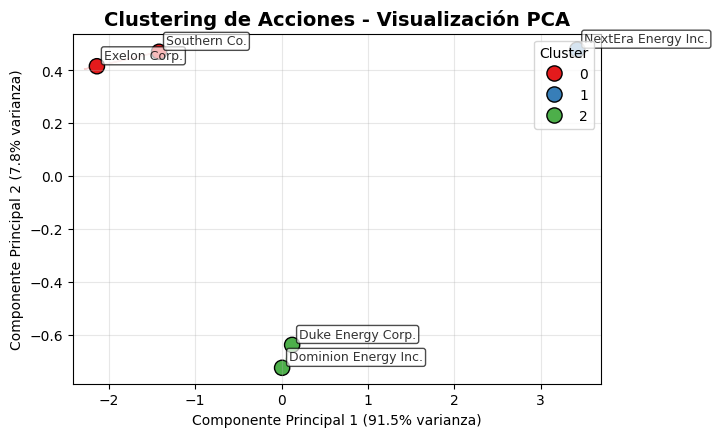

In [44]:
# Paleta de colores
palette = sns.color_palette("Set1", n_colors=len(df_plot['cluster'].unique()))
cluster_colors = {cluster: palette[i] for i, cluster in enumerate(sorted(df_plot['cluster'].unique()))}

# VISUALIZACIÓN MEJORADA DE CLUSTERS
plt.figure(figsize=(15, 10))

# Gráfico 1: Clustering con PCA y nombres completos
ax1 = plt.subplot(2, 2, 1)

# Scatter plot con colores por cluster
scatter = sns.scatterplot(
    data=df_plot,
    x="PCA1", y="PCA2",
    hue="cluster",
    palette=cluster_colors,
    s=120,
    edgecolor="black",
    linewidth=1,
    ax=ax1
)

# Etiquetas con nombres completos de las acciones
for i, row in df_plot.iterrows():
    ax1.annotate(df_plot['name'][i], 
                (row['PCA1'], row['PCA2']),
                xytext=(5, 5),
                textcoords='offset points',
                fontsize=9,
                alpha=0.8,
                bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))

# Dibujar elipses para cada cluster
for cluster_id in df_plot['cluster'].unique():
    cluster_points = df_plot[df_plot['cluster'] == cluster_id][["PCA1", "PCA2"]]
    if len(cluster_points) > 1:
        center = cluster_points.mean().values
        cov = np.cov(cluster_points.T)
        color = cluster_colors[cluster_id]
        draw_ellipse(center, cov, ax1, color=color)

ax1.set_title("Clustering de Acciones - Visualización PCA", fontsize=14, fontweight='bold')
ax1.set_xlabel(f"Componente Principal 1 ({pca.explained_variance_ratio_[0]:.1%} varianza)")
ax1.set_ylabel(f"Componente Principal 2 ({pca.explained_variance_ratio_[1]:.1%} varianza)")
ax1.legend(title="Cluster", loc='upper right')
ax1.grid(True, alpha=0.3)


In [48]:
# TABLA RESUMEN POR CLUSTER
print("\n=== RESUMEN POR CLUSTER ===")
for cluster_id in sorted(features_normalized['cluster_kmeans'].unique()):
    cluster_data = features_normalized[features_normalized['cluster_kmeans'] == cluster_id]
    print(f"\n--- CLUSTER {cluster_id} ---")
    print(f"Acciones incluidas ({len(cluster_data)}):")
    for name in cluster_data['name'].unique():
        count = len(cluster_data[cluster_data['name'] == name])
        print(f"  - {name}: {count} acción(es)")
    
    print(f"Precio promedio de cierre: ${cluster_data['close_norm'].mean():.2f}")
    print(f"Volumen promedio: {cluster_data['volume_norm'].mean():,.0f}")
    print(f"Volatilidad promedio: ${cluster_data['volatility_norm'].mean():.2f}")



=== RESUMEN POR CLUSTER ===

--- CLUSTER 0 ---
Acciones incluidas (2):
  - Exelon Corp.: 1 acción(es)
  - Southern Co.: 1 acción(es)
Precio promedio de cierre: $-0.94
Volumen promedio: 1
Volatilidad promedio: $-0.92

--- CLUSTER 1 ---
Acciones incluidas (1):
  - NextEra Energy Inc.: 1 acción(es)
Precio promedio de cierre: $1.78
Volumen promedio: -1
Volatilidad promedio: $1.81

--- CLUSTER 2 ---
Acciones incluidas (2):
  - Dominion Energy Inc.: 1 acción(es)
  - Duke Energy Corp.: 1 acción(es)
Precio promedio de cierre: $0.05
Volumen promedio: -1
Volatilidad promedio: $0.02


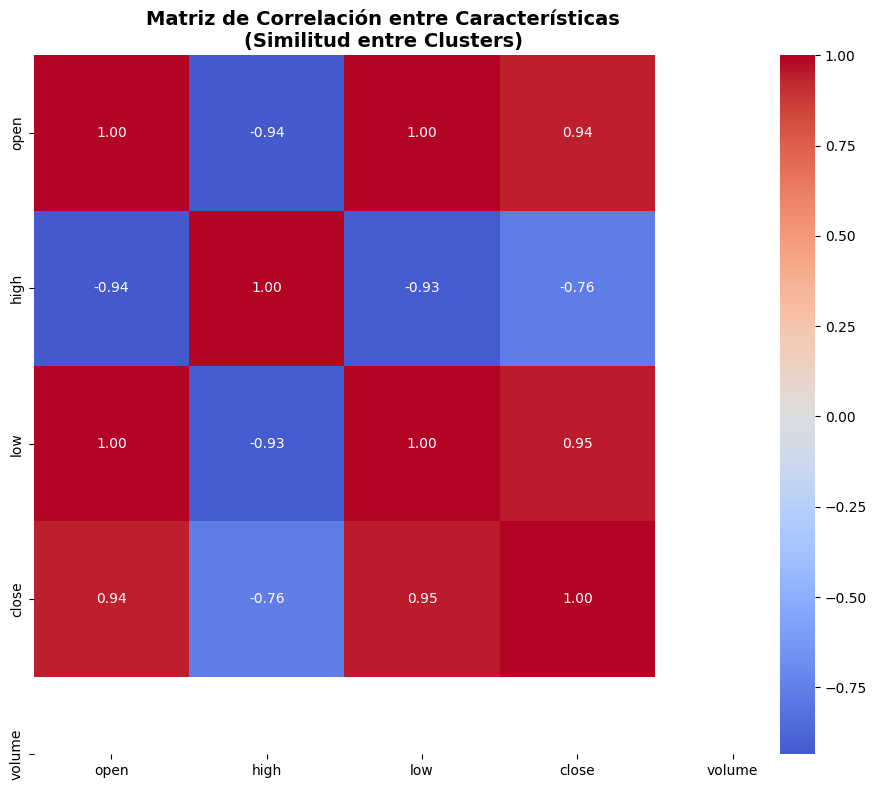

In [52]:
# GRÁFICO ADICIONAL: Heatmap de correlación entre clusters
plt.figure(figsize=(10, 8))

# Calcular características promedio por cluster
columns = [
"close_norm", "volume_norm",	"volatility_norm",	"change_norm"]

cluster_means = features_normalized.groupby('cluster_kmeans')[columns].mean()

# Heatmap de similitud entre clusters
similarity_matrix = np.corrcoef(cluster_means.T)

sns.heatmap(similarity_matrix, 
           xticklabels=['open', 'high', 'low', 'close', 'volume'],
           yticklabels=['open', 'high', 'low', 'close', 'volume'],
           annot=True, cmap='coolwarm', center=0,
           square=True, fmt='.2f')
plt.title('Matriz de Correlación entre Características\n(Similitud entre Clusters)', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()